K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=0.98
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


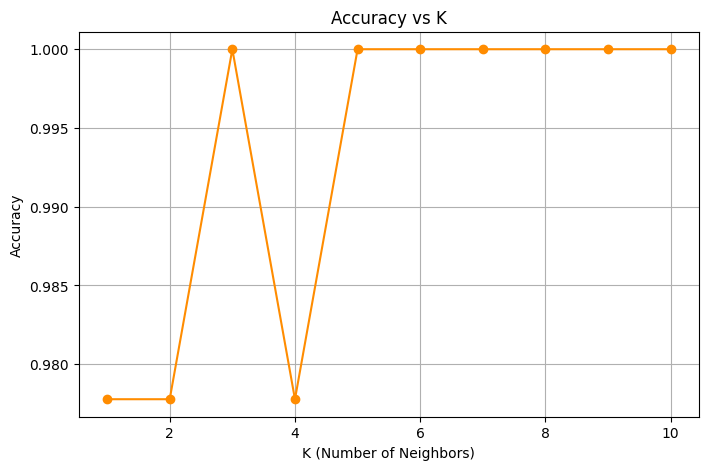


Best K value: 3
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



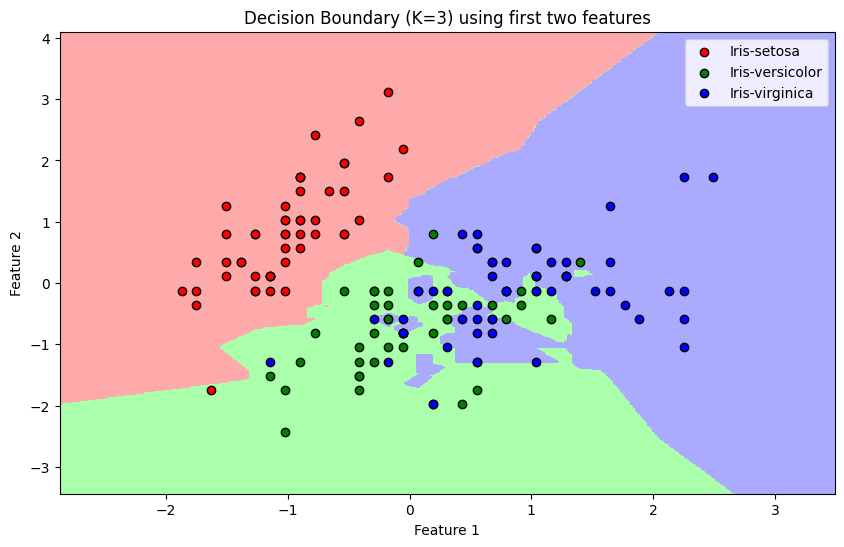

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Load the dataset
df = pd.read_csv("Iris.csv")

# Drop the ID column if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# 2. Separate features and target
X = df.iloc[:, :-1].values  # all columns except the last one
y = df.iloc[:, -1].values   # the last column (Species)

# 3. Encode class labels if they are strings
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# 6. Try different values of K
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

# 7. Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='darkorange')
plt.title("Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# 8. Best K
best_k = k_values[np.argmax(accuracies)]
print("\nBest K value:", best_k)

# 9. Final model
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)

# 10. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))
print("\nClassification Report:\n", classification_report(y_test, y_final_pred, target_names=label_encoder.classes_))

# 11. Visualize decision boundaries (only 2 features for 2D plotting)
X_vis = X[:, :2]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis_scaled, y_encoded, test_size=0.3, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_v, y_train_v)

# Create meshgrid
h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
for i, color in zip(np.unique(y_encoded), cmap_bold):
    plt.scatter(X_vis_scaled[y_encoded == i, 0], X_vis_scaled[y_encoded == i, 1],
                c=color, label=label_encoder.classes_[i], edgecolor='k')
plt.legend()
plt.title(f"Decision Boundary (K={best_k}) using first two features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()